## Corona Virus NLP Tweets

Data set from https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification

Following along and building on the NLP workshop at GHC '23 Conference led by Dr. Nimrita Koul, Associate Professor, Machine Learning, Bangalore, India

In [2]:
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv',  encoding='latin-1') #using encoding = "latin-1" as the dataset has some non-ASCII characters
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


To get an initial understanding of our data, we utilize the describe() method. This gives us a statistical summary of numeric columns, helping in identifying any potential outliers or patterns at first glance.

In [31]:
df.describe()

,word_count
count,41140.000000
mean,16.594895
std,7.160664
min,1.000000
25%,11.000000
50%,17.000000
75%,22.000000
max,56.000000


This dataset is a corpus of 41,140 tweets pulled from Twitter that have been manually tagged. The unit of analysis is a tweet and each column corresponds to relevant details about the tweet, including its sentiment. To streamline our analysis, we've decided to drop columns that might not directly contribute to our primary goal of sentiment analysis. This step simplifies our dataset and allows us to focus on the core features, namely, the tweet content and its sentiment.

In [3]:
df = df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)
df.columns

Index(['OriginalTweet', 'Sentiment'], dtype='object')

In [4]:
df.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [5]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

Understanding the unique sentiment labels in our dataset is pivotal. This gives us insight into the range of sentiments expressed in the tweets and helps set the stage for our sentiment analysis task. It's essential to know whether we are dealing with binary sentiments (e.g., Positive/Negative) or a broader range.

In [6]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Getting a distribution of sentiment labels is important. This helps us understand the balance (or imbalance) of sentiments in our dataset. A highly imbalanced dataset might require special techniques during model training to ensure that minority sentiments are adequately represented.

### Data Cleaning and pre-processing

Normalizing the tweet content by converting it to lowercase ensures that our analysis is case-insensitive. This step aids in ensuring that words like 'COVID', 'covid', and 'Covid' are treated the same, eliminating potential discrepancies due to varied capitalization. Removing stopwords and punctuation is a standard practice in text preprocessing. Stopwords, being common across most documents, don't offer much value in distinguishing sentiments. Similarly, punctuation might not contribute significantly to sentiment analysis in most cases. By removing these, we can focus on the core words that drive sentiment.

Mentions and hashtags, though integral to the Twitter ecosystem, may not necessarily contribute to the sentiment of a tweet. Removing them ensures that our sentiment analysis focuses on the core content of the tweet. However, it's worth noting that in certain contexts, analyzing hashtags separately might provide additional insights into trending topics or sentiments.

Emojis, while expressive, introduce complexity when processing text data. Their interpretation can be subjective and might vary across cultures. While they can be valuable for sentiment analysis, we've chosen to remove them in this analysis. For a more nuanced approach, one could consider dedicated emoji sentiment lexicons or specialized models that handle emojis.

Focusing on ASCII characters streamlines our analysis, especially if our primary audience or dataset is English-centric. However, this step might not be suitable for multilingual datasets or analyses targeting specific non-English languages

In [7]:
df['OriginalTweet'] = df['OriginalTweet'].str.lower()
df.head()

,OriginalTweet,Sentiment
0,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia: woolworths to give elde...,Positive
3,my food stock is not the only one which is emp...,Positive
4,"me, ready to go at supermarket during the #cov...",Extremely Negative


In [8]:
import nltk
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stopwordsandpunct = stop_words + list(string.punctuation)

df['OriginalTweet'] = df['OriginalTweet'].apply(lambda w:' '.join(w for w in w.split() if w not in stopwordsandpunct))
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk neighbours family exchange phone n...
2        coronavirus australia: woolworths give elderly...
3        food stock one empty... please, panic, enough ...
4        me, ready go supermarket #covid19 outbreak. i'...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint provided citing covid-19 re...
41154    know itâs getting tough @kameronwilds rationi...
41155    wrong smell hand sanitizer starting turn on? #...
41156    @tartiicat well new/used rift going $700.00 am...
Name: OriginalTweet, Length: 41157, dtype: object

In [9]:
# Remove URLs from all the tweets
import re
def remove_url(tweet):
    tweet = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet)
    return tweet

df['OriginalTweet'] = df['OriginalTweet'].apply(remove_url)
df['OriginalTweet'].head()

0                   @menyrbie @phil_gahan @chrisitv   
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock one empty... please, panic, enough ...
4    me, ready go supermarket #covid19 outbreak. i'...
Name: OriginalTweet, dtype: object

In [10]:
# remove mentions and hashtags
def remove_mentions_hashs(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet) #Remove mentions
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet) #Remove hashtags
    return tweet

df['OriginalTweet'] = df['OriginalTweet'].apply(remove_mentions_hashs)
df['OriginalTweet'].head()

0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia: woolworths give elderly...
3    food stock one empty... please, panic, enough ...
4    me, ready go supermarket  outbreak. i'm parano...
Name: OriginalTweet, dtype: object

In [11]:
import re
def remove_emojis(tweet):
    pat =      re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return pat.sub(r'', tweet)

df['OriginalTweet'] = df['OriginalTweet'].apply(remove_emojis)
df.head()

,OriginalTweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia: woolworths give elderly...,Positive
3,"food stock one empty... please, panic, enough ...",Positive
4,"me, ready go supermarket outbreak. i'm parano...",Extremely Negative


In [12]:
import string
def remove_empty_strings1(tweet):
    tweet = re.sub(r"^\s+|\s+$", 'NaN', tweet)
    return tweet
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_empty_strings1)

In [13]:
import unicodedata
def remove_nonascii(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_nonascii)
df.head()

,OriginalTweet,Sentiment
0,NaN,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia: woolworths give elderly...,Positive
3,"food stock one empty... please, panic, enough ...",Positive
4,"me, ready go supermarket outbreak. i'm parano...",Extremely Negative


In [14]:
df = df[df['OriginalTweet'] != 'NaN']
df = df.reset_index(drop = True)
df.head()

,OriginalTweet,Sentiment
0,advice talk neighbours family exchange phone n...,Positive
1,coronavirus australia: woolworths give elderly...,Positive
2,"food stock one empty... please, panic, enough ...",Positive
3,"me, ready go supermarket outbreak. i'm parano...",Extremely Negative
4,news regionas first confirmed covid-19 case ca...,Positive


## Tokenization and Normalization 

Tokenization is a foundational step in text preprocessing. By breaking down tweets into individual tokens (words or terms), we can analyze the frequency, distribution, and co-occurrence of words. This not only aids in understanding the dataset but also prepares the data for vectorization techniques like TF-IDF or word embeddings, which are commonly used in machine learning models for text data. 

Lemmatization is an advanced form of normalization that can be particularly useful in text analysis. By reducing words to their root form, we can group together different inflections or derivations of a word, ensuring that our analysis captures the underlying meaning and not just the specific form of a word. This step can enhance the consistency and robustness of our analysis.

In [15]:
import nltk
from nltk import word_tokenize
tokenizer = nltk.tokenize.WhitespaceTokenizer()
def tokenize(text):
    return tokenizer.tokenize(text)

df['OriginalTweet'] = df['OriginalTweet'].apply(tokenize)
df['OriginalTweet'].head()

0    [advice, talk, neighbours, family, exchange, p...
1    [coronavirus, australia:, woolworths, give, el...
2    [food, stock, one, empty..., please,, panic,, ...
3    [me,, ready, go, supermarket, outbreak., i'm, ...
4    [news, regionas, first, confirmed, covid-19, c...
Name: OriginalTweet, dtype: object

In [16]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in text]

df['OriginalTweet'] = df['OriginalTweet'].apply(lemmatize)
df.head()

,OriginalTweet,Sentiment
0,"[advice, talk, neighbour, family, exchange, ph...",Positive
1,"[coronavirus, australia:, woolworth, give, eld...",Positive
2,"[food, stock, one, empty..., please,, panic,, ...",Positive
3,"[me,, ready, go, supermarket, outbreak., i'm, ...",Extremely Negative
4,"[news, regionas, first, confirmed, covid-19, c...",Positive


Frequency analysis of tokens provides insights into the most commonly mentioned terms in the tweets. Understanding the most frequent terms can give us a glimpse into the main topics or concerns expressed in the dataset and help with dimensioanlity reduction further down the line. 

In [17]:
import itertools
import collections
all_tweets = list(df["OriginalTweet"])
all_tokens = list(itertools.chain(*all_tweets))
token_counts = collections.Counter(all_tokens)

In [18]:
token_counts.most_common(10)

[('price', 7321),
 ('store', 6517),
 ('grocery', 6274),
 ('supermarket', 6056),
 ('food', 6033),
 ('covid-19', 5286),
 ('people', 5002),
 ('consumer', 4611),
 ('&amp;', 3540),
 ('19', 3411)]

In [19]:
df_token_counts = pd.DataFrame(token_counts.most_common(20), columns=['Token','Count'])
df_token_counts.head()

,Token,Count
0,price,7321
1,store,6517
2,grocery,6274
3,supermarket,6056
4,food,6033


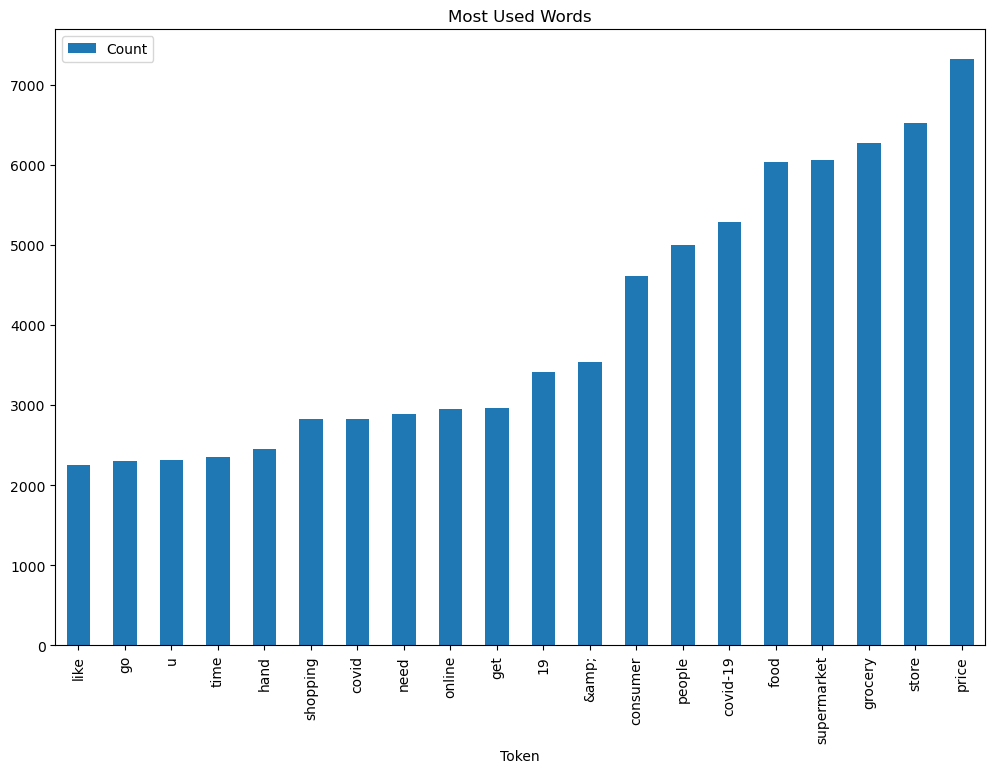

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
df_token_counts.sort_values(by = 'Count').plot.bar(x='Token', y='Count')
plt.title('Most Used Words')
plt.show()

In [21]:
df['word_count'] = df['OriginalTweet'].apply(lambda x: len(str(x).split()))

print(df[df['Sentiment']=="Positive"]['word_count'].mean()) #Positive tweets
print(df[df['Sentiment']=="Neutral"]['word_count'].mean()) #Neutral tweets

print(df[df['Sentiment']=="Negative"]['word_count'].mean()) #Negative tweets
print(df[df['Sentiment']=="Extremely Positive"]['word_count'].mean()) #Extremely Positive tweets
print(df[df['Sentiment']=="Extremely Negative"]['word_count'].mean()) #Extremely Negative tweets

16.85350262697023
11.93713469281725
16.761093182734975
19.152626811594203
19.20689655172414


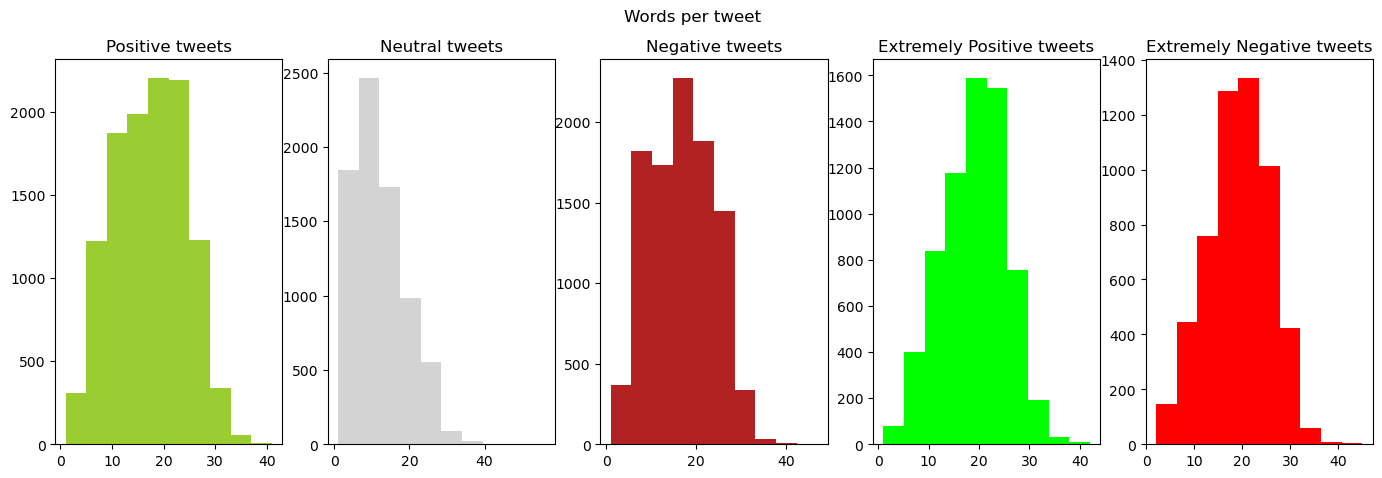

In [22]:
# PLOTTING WORD-COUNT
import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3, ax4, ax5)=plt.subplots(1,5,figsize=(17,5))

train_words=df[df['Sentiment']=='Positive']['word_count']
ax1.hist(train_words,color='yellowgreen')
ax1.set_title('Positive tweets')

train_words=df[df['Sentiment']=='Neutral']['word_count']
ax2.hist(train_words,color='lightgray')
ax2.set_title('Neutral tweets')


train_words=df[df['Sentiment']=='Negative']['word_count']
ax3.hist(train_words,color='firebrick')
ax3.set_title('Negative tweets')

train_words=df[df['Sentiment']=='Extremely Positive']['word_count']
ax4.hist(train_words,color='lime')
ax4.set_title('Extremely Positive tweets')

train_words=df[df['Sentiment']=='Extremely Negative']['word_count']
ax5.hist(train_words,color='red')
ax5.set_title('Extremely Negative tweets')


fig.suptitle('Words per tweet')
plt.show()

It seems the "Extremely Positive" and "Extremely Negative" tweets tend to be longer on average compared to other sentiments. This could indicate that when users have strong feelings (either positive or negative), they use more words to express themselves.

In [25]:
from gensim import corpora
from gensim.models import LdaModel

# Preprocessing for topic modeling
subset_df = df.sample(frac=0.3, random_state=42)
dictionary = corpora.Dictionary(subset_df['OriginalTweet'])
corpus = [dictionary.doc2bow(text) for text in subset_df['OriginalTweet']]

# LDA model
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=5)
topics = lda_model.print_topics(num_words=5)
topics

[(0,
  '0.015*"hand" + 0.013*"food" + 0.009*"sanitizer" + 0.009*"people" + 0.007*"stock"'),
 (1,
  '0.037*"price" + 0.012*"covid-19" + 0.010*"consumer" + 0.009*"oil" + 0.007*"demand"'),
 (2,
  '0.015*"supermarket" + 0.013*"food" + 0.010*"store" + 0.010*"19" + 0.009*"worker"'),
 (3,
  '0.016*"store" + 0.016*"shopping" + 0.014*"online" + 0.014*"grocery" + 0.009*"covid-19"'),
 (4,
  '0.018*"grocery" + 0.015*"store" + 0.012*"food" + 0.010*"supermarket" + 0.008*"like"')]

* Consumer Behavior and COVID-19: Words like "consumer", "covid-19", and "online" suggest a topic related to consumer reactions or behaviors due to COVID-19.
* Economic Impacts: Words like "prices", "food", and "oil" indicate concerns or discussions about the economic impacts, especially related to essential goods.
* Queries and Concerns: Symbols and words like "?", "cure", and "???" suggest this topic might be about queries, concerns, or looking for answers.
* Grocery Shopping: Words like "grocery", "store", and "supermarket" are about the shopping experience in physical stores during the pandemic.
* Online Shopping and Hygiene: Words like "hand", "shopping", "online", and "sanitizer" hint at a topic concerning online shopping and hygiene practices.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# Train - test split
X_train, X_test, y_train, y_test = train_test_split(df["OriginalTweet"].apply(lambda x: ', '.join(x)),df["Sentiment"],test_size=0.1,random_state=42)
# Converting text to numbers using TFIDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

Support Vector Machines (SVM) are powerful classifiers that work well for both binary and multiclass classification problems, especially when dealing with high-dimensional data. Given the nature of text data (often high-dimensional due to the vast vocabulary), SVM is a suitable choice for sentiment classification. The choice of the 'ovo' (one-vs-one) strategy indicates that for each pair of classes, a binary classifier is trained. The class with the highest votes is then chosen as the final prediction. Evaluating the model's accuracy on the test data provides a quantitative measure of how well the model generalizes to unseen data.

In [42]:
# Classfication using Naive Bayer Classifier
from sklearn import svm
from sklearn.metrics import accuracy_score
# Multiclass classification
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train_vectors_tfidf, y_train)  

#Predict y value for test dataset
y_predict = clf.predict(X_test_vectors_tfidf)

accuracy_score(y_test, y_predict)

0.6037919299951385

Evaluation Metrics for SVM:
                    precision    recall  f1-score   support

Extremely Negative       0.75      0.42      0.54       511
Extremely Positive       0.81      0.47      0.59       701
          Negative       0.54      0.62      0.57       982
           Neutral       0.66      0.69      0.67       731
          Positive       0.55      0.70      0.61      1189

          accuracy                           0.60      4114
         macro avg       0.66      0.58      0.60      4114
      weighted avg       0.63      0.60      0.60      4114



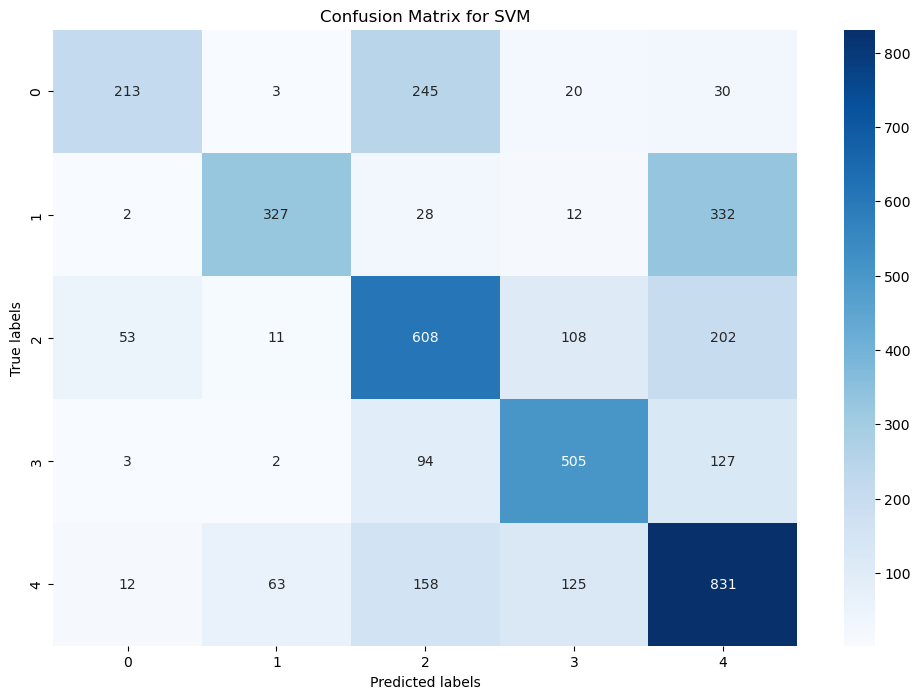

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluation for SVM
print("Evaluation Metrics for SVM:")
print(classification_report(y_test, y_predict))

# Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM')
plt.show()


The SVM classifier demonstrated an overall accuracy of 60% in sentiment classification of tweets related to the coronavirus. While the model showed a relatively balanced performance for the "Neutral" sentiment with an F1-score of 67%, it faced challenges in correctly identifying "Extremely Negative" tweets, achieving only a 42% recall. The "Positive" sentiment saw a commendable recall of 70%, albeit with room for improvement in precision. Across sentiments, there exists a discernible gap between precision and recall, highlighting the need for model refinement. Tweaking hyperparameters or exploring different SVM kernels might offer avenues for enhancement.

# Compare to Other Classifiers 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_vectors_tfidf, y_train)
rf_predict = rf_clf.predict(X_test_vectors_tfidf)
print("Evaluation Metrics for Random Forest:")
print(classification_report(y_test, rf_predict))

# Logistic Regression Classifier
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_vectors_tfidf, y_train)
lr_predict = lr_clf.predict(X_test_vectors_tfidf)
print("Evaluation Metrics for Logistic Regression:")
print(classification_report(y_test, lr_predict))


Evaluation Metrics for Random Forest:
                    precision    recall  f1-score   support

Extremely Negative       0.65      0.38      0.48       511
Extremely Positive       0.66      0.35      0.46       701
          Negative       0.48      0.50      0.49       982
           Neutral       0.55      0.75      0.63       731
          Positive       0.47      0.57      0.52      1189

          accuracy                           0.52      4114
         macro avg       0.56      0.51      0.52      4114
      weighted avg       0.54      0.52      0.52      4114

Evaluation Metrics for Logistic Regression:
                    precision    recall  f1-score   support

Extremely Negative       0.66      0.46      0.54       511
Extremely Positive       0.68      0.50      0.58       701
          Negative       0.53      0.55      0.54       982
           Neutral       0.62      0.70      0.66       731
          Positive       0.53      0.62      0.57      1189

          acc


Logistic Regression, Random Forest, and SVM are all powerful classifiers, each with its distinct strengths. Logistic Regression is a simple linear model that's interpretable and suitable for binary and multiclass classification tasks, especially when a probabilistic outcome is desired. Random Forest, on the other hand, is an ensemble method that builds multiple decision trees and merges their outputs. It's versatile, handles high dimensionality well, and can provide insights into feature importance. SVM, a margin-based classifier, excels in high-dimensional spaces and can handle non-linear decision boundaries using kernel tricks.

Analyzing the provided evaluation metrics, Random Forest yields an overall accuracy of 52% with the "Neutral" sentiment achieving the highest F1-score of 63%. Logistic Regression shows an improved accuracy of 58%, with "Neutral" and "Extremely Positive" sentiments having F1-scores of 66% and 58%, respectively. Compared to the SVM's accuracy of 60%, both Random Forest and Logistic Regression models lag slightly behind, though the differences are marginal.

Given the results, SVM offers the best overall performance. However, the choice between these models should also consider factors like interpretability, computational efficiency, and ease of deployment. While SVM has the edge in raw accuracy, Logistic Regression's simplicity and interpretability might make it more suitable for applications where model insights are crucial. It's recommended to further tune and validate each model using additional datasets to ascertain the best choice for the specific use case.